In [1]:
import json
import os
import sys
import time

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

from pykalman import KalmanFilter

In [2]:
Data_dir = 'generated_images/'

In [3]:
dict_img_json = {}
for root, dirs, files in os.walk(Data_dir):
    for file in files:
        if file.endswith(".json"):
            dict_img_json[file.split(".")[0]+".png"] = json.load(open(os.path.join(root, file)))


In [4]:
dict_img_json

{'image_0376.png': [{'label': 'female',
   'x': 700,
   'y': 74,
   'width': 90,
   'height': 93},
  {'label': 'female', 'x': 894, 'y': 74, 'width': 91, 'height': 95},
  {'label': 'female', 'x': 700, 'y': 274, 'width': 94, 'height': 98},
  {'label': 'female', 'x': 894, 'y': 274, 'width': 101, 'height': 105},
  {'label': 'female', 'x': 700, 'y': 474, 'width': 94, 'height': 98},
  {'label': 'female', 'x': 894, 'y': 474, 'width': 87, 'height': 91},
  {'label': 'male', 'x': 700, 'y': 674, 'width': 91, 'height': 97},
  {'label': 'female', 'x': 894, 'y': 674, 'width': 89, 'height': 93},
  {'label': 'female', 'x': 700, 'y': 874, 'width': 90, 'height': 94},
  {'label': 'female', 'x': 894, 'y': 874, 'width': 96, 'height': 100}],
 'image_0726.png': [{'label': 'female',
   'x': 700,
   'y': 11,
   'width': 99,
   'height': 103},
  {'label': 'female', 'x': 894, 'y': 11, 'width': 92, 'height': 96},
  {'label': 'female', 'x': 700, 'y': 211, 'width': 97, 'height': 101},
  {'label': 'female', 'x': 894

In [ ]:
# convert json to yolov5 format 

In [18]:
import cv2
import matplotlib.pyplot as plt

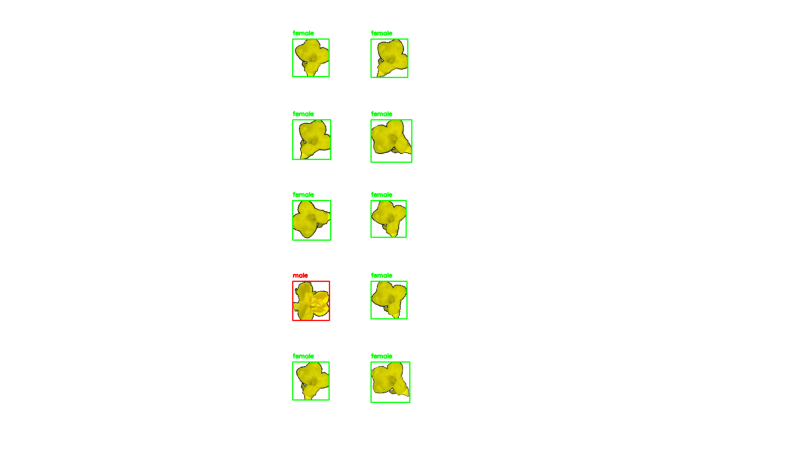

In [19]:
def draw_bounding_boxes(image_path, image_data):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct display with matplotlib

    # Loop through the bounding boxes and draw them
    for bbox in image_data:
        x, y, width, height = bbox['x'], bbox['y'], bbox['width'], bbox['height']
        label = bbox['label']
        color = (255, 0, 0) if label == 'male' else (0, 255, 0)
        
        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)

        # Draw the label
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return img

image_name = "image_0376.png"
image_path = os.path.join(Data_dir, image_name)
img_with_boxes = draw_bounding_boxes(image_path, dict_img_json[image_name])

plt.figure(figsize=(10, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()